In [2]:
from PIL import Image, ImageOps, ExifTags, ImageEnhance
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage.util import random_noise

In [8]:
# Resolving Metadata Issues from image
img = Image.open('sample_image.jpg')

exif = { ExifTags.TAGS[k]: v for k, v in img._getexif().items() if k in ExifTags.TAGS }
print(exif)

{'ResolutionUnit': 2, 'ExifOffset': 110, 'YResolution': 72.0, 'Orientation': 1, 'XResolution': 72.0, 'Artist': 'MAXIXEN', 'ExifImageWidth': 1100, 'ExifImageHeight': 733}


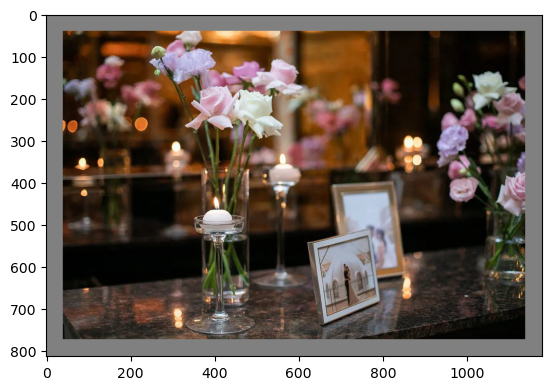

In [9]:
# Inputs percentage and image, and returns the image by adding 
# white/gray/black border. Border size should be according to the percentage 
# of width and height.

def taking_image(x, y, z):
    if z == 'white':
        selected_color = (255,255,255)
    elif z == 'gray':
        selected_color = (128,128,128)
    else:
        selected_color = (0,0,0)
    bordered =  ImageOps.expand(x, border=y, fill=selected_color)
    return plt.imshow(bordered)
    
my_image = Image.open('sample_image.jpg')
width = int(input("Enter width of border: "))
height = int(input("Enter height of border: "))
choice = input("which color of border? Type 'White', 'Gray' or 'Black").lower()
border_percentage = (height, width)


taking_image(my_image, border_percentage, choice)



/tmp/ipykernel_5207/1058300250.py:17: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  image = image.resize((new_width, adjusted_height), Image.ANTIALIAS)


(1024, 809)


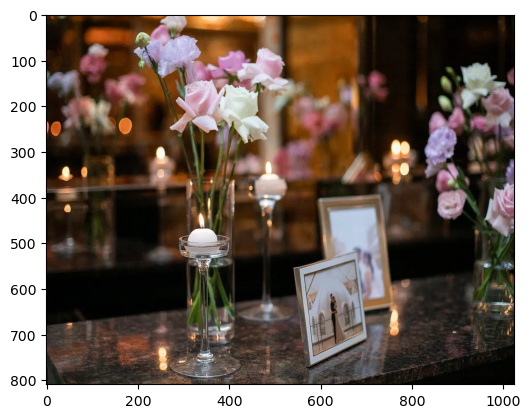

In [6]:
# Inputs image, and resize the image with fix width size 1024 pixels and 
# the heights should be adjust according to the aspect ratio of the image

my_image = Image.open('sample_image.jpg')

def resizing(image):
    height = image.size[0]
    image_width = image.size[1]

    new_width = 1024
    leftover = abs(new_width-image_width)
    if new_width > image_width:
        adjusted_height = height - leftover
    else:
        adjusted_height = height + leftover
    
    image = image.resize((new_width, adjusted_height), Image.ANTIALIAS)
    print(image.size)
    
    return plt.imshow(image)
        
        
resizing(my_image)





(<matplotlib.image.AxesImage at 0x7f078d9a3ac0>, (733, 1100, 3))

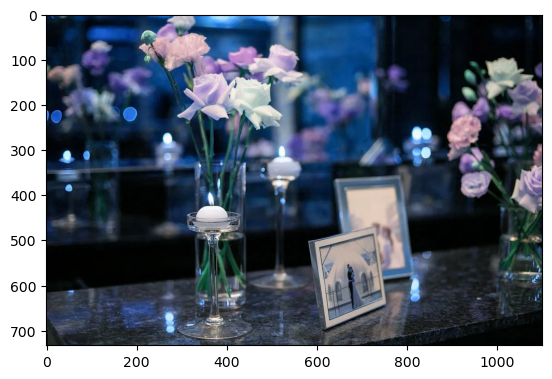

In [7]:
# Inputs an image and multiplying factor, and returns the resized image
# according to multiplying factor.
def multiply_factor(img, factor):
    factor = mul_factor/100
    width = int(img.shape[1] * factor)
    height = int(img.shape[0] * factor)
    new_image = cv2.resize(img, (width, height))
    return plt.imshow(new_image), new_image.shape
   

image = cv2.imread('sample_image.jpg')
mul_factor = int(input("Enter a resize percentage: "))

multiply_factor(image, mul_factor)



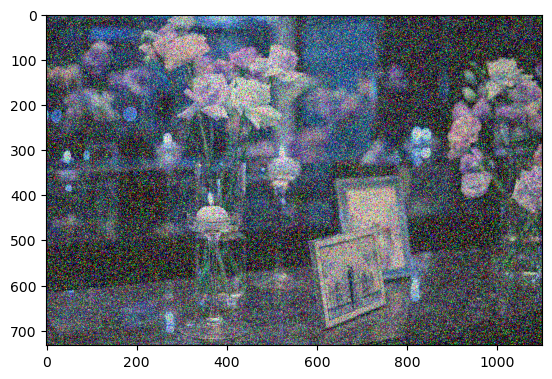

In [8]:
# Inputs an image and add noice on it
def noise_image(img):    
    noise_img = random_noise(img, mode='s&p', amount=0.4)
    noise_img = np.array(255*noise_img, dtype = 'uint8')

    return plt.imshow(noise_img)

noise_image(image)

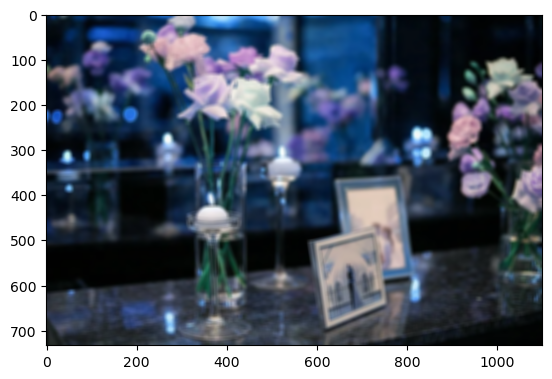

In [10]:
# Inputs an image and add blur on it
def blur(img):
    img_rst = cv2.blur(img, (10,10))
    return plt.imshow(img_rst)

blur(image)

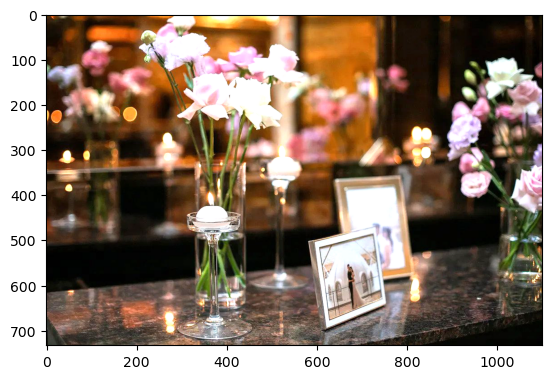

In [15]:
# Inputs an image and change brightness of that image

image = Image.open('sample_image.jpg')
def brightness(img):
    enhancer = ImageEnhance.Brightness(img)

    factor = 1.5 # Brightens the Image
    img_output = enhancer.enhance(factor)
    return plt.imshow(img_output)

brightness(image)

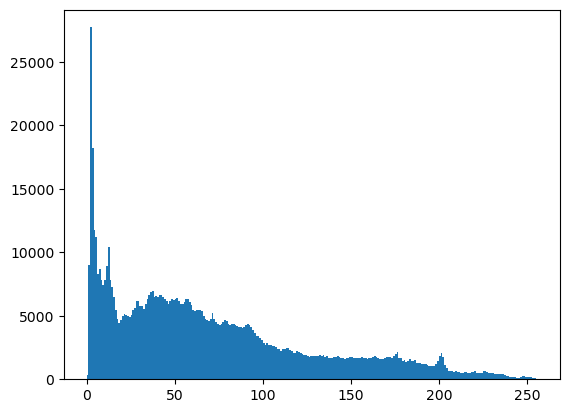

In [21]:
# Inputs an image, calculate histograms of that image and remove the pixels colors,
# whose frequency is less (grayscale)
image = cv2.imread('sample_image.jpg')
def histogram(img):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # hist = cv2.calcHist([gray_img], [0], None, [256], [0, 256])
    plt.hist(gray_img.ravel(), 256, [0, 256])
    return plt.show()

histogram(image)

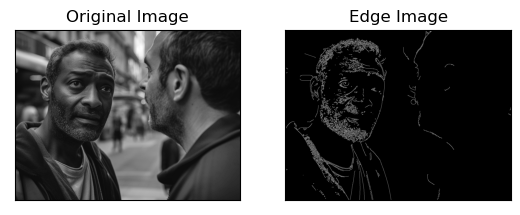

In [6]:
# Canny edge detection
image = cv2.imread('abc.png', cv2.IMREAD_GRAYSCALE)
edges = cv2.Canny(image, 100, 200)
plt.subplot(121)
plt.imshow(image,cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


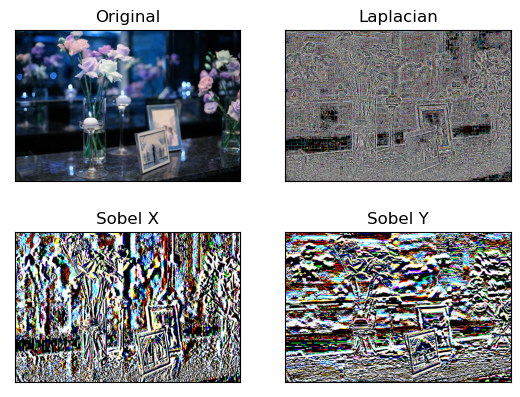

In [25]:
#Sobel edge detection
img = cv2.imread('sample_image.jpg')

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # y

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()